# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.      

In [209]:
# Importerer nødvendige biblioteker
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [210]:
# Definerer funksjonene
def demand(x):
    return (500-3.2*x)

def supply(x,t):
    return (-100+4.3*(x-t))

In [211]:
# Lager likevektsbetingelsen
x,t=sp.symbols('x, t', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x,0))
equ

Eq(500 - 3.2*x, 4.3*x - 100)

In [212]:
x_eq=sp.solve(equ,x)
x_eq=float(x_eq[0])

In [213]:
p_eq =demand(x_eq)
p_eq

244.0

2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.     

3. Tegn likevekten for $t=0$ og fargelegg KO og PO.     

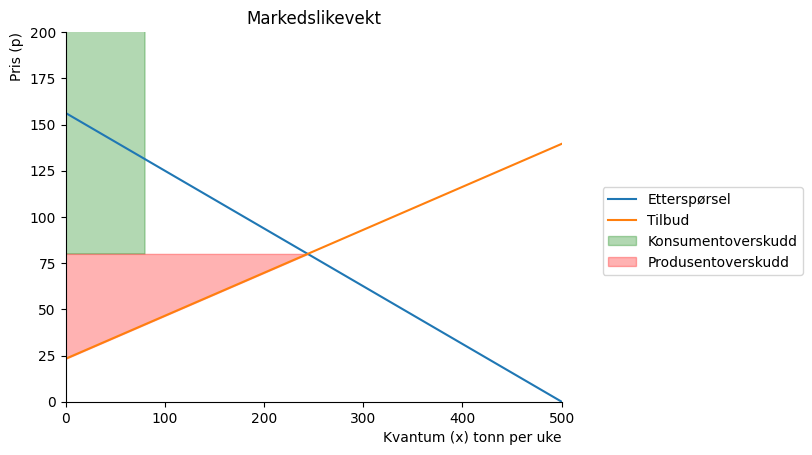

In [214]:
x_num=np.linspace(0.1,500,100)
q = np.linspace(0,x_eq,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x) tonn per uke', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num),x_num, label='Etterspørsel')
ax.plot(supply(x_num,0),x_num, label='Tilbud')



# tittel
ax.set_title('Markedslikevekt')

ax.fill_between(q,demand(q), x_eq, color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(supply(q, 0),q, x_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

4. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      

5. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||